In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Importing data

In [2]:
customer = pd.read_csv(r"C:\Users\prana\Desktop\Quarntine\AnalatyicsLab\Python\3._Case_Studies_Final_Projects_-_Python\3. Pandas Case Study 1 - Retail Case Study\Customer.csv")

In [3]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
customer.shape

(5647, 4)

In [5]:
transactions = pd.read_csv(r"C:\Users\prana\Desktop\Quarntine\AnalatyicsLab\Python\3._Case_Studies_Final_Projects_-_Python\3. Pandas Case Study 1 - Retail Case Study\Transactions.csv")

In [6]:
transactions.head()
#len(transactions.transaction_id)
#transactions.shape

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [7]:
transactions.shape

(23053, 10)

In [8]:
23053 - 23194 

-141

In [9]:
product = pd.read_csv(r"C:\Users\prana\Desktop\Quarntine\AnalatyicsLab\Python\3._Case_Studies_Final_Projects_-_Python\3. Pandas Case Study 1 - Retail Case Study\prod_cat_info.csv")

In [10]:
product.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [11]:
product.groupby(["prod_cat","prod_subcat"]).first()

prod_cat_code  prod_sub_cat_code
prod_cat         prod_subcat                                          
Bags             Mens                             4                  1
                 Women                            4                  4
Books            Academic                         5                 12
                 Children                         5                 11
                 Comics                           5                  3
                 DIY                              5                  6
                 Fiction                          5                  7
                 Non-Fiction                      5                 10
Clothing         Kids                             1                  3
                 Mens                             1                  4
                 Women                            1                  1
Electronics      Audio and video                  3                 10
                 Cameras                          3                  9
                 Computers                        3                  5
                 Mobiles                          3                  4
                 Personal Appliances              3                  8
Footwear         Kids                             2                  4
                 Mens                             2                  1
                 Women                            2                  3
Home and kitchen Bath                             6                 11
                 Furnishing                       6                  2
                 Kitchen                          6                 10
                 Tools                            6                 12

In [12]:
product.shape

(23, 4)

In [13]:
cus_txn = pd.merge(left = customer,right = transactions ,left_on="customer_Id" ,right_on="cust_id",how = "inner")

In [14]:
cus_txn.rename(columns={"prod_subcat_code":"prod_sub_cat_code"},inplace=True)

In [15]:
cus_txn.isnull().sum()

customer_Id          0
DOB                  0
Gender               9
city_code            8
transaction_id       0
cust_id              0
tran_date            0
prod_sub_cat_code    0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
dtype: int64

In [16]:
23053 - 23194 #before - after joins

-141

In [17]:
cus_txn.shape

(23053, 14)

In [18]:
cus_txn_pdt = pd.merge(left = cus_txn,right=product)

In [19]:
cus_txn_pdt

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction


In [20]:
cus_txn_pdt.isnull().sum()

customer_Id          0
DOB                  0
Gender               9
city_code            8
transaction_id       0
cust_id              0
tran_date            0
prod_sub_cat_code    0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat             0
prod_subcat          0
dtype: int64

In [21]:
Customer_Final = cus_txn_pdt

In [22]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
5,274630,01-02-1970,M,4.0,78357345891,274630,11/4/2012,7,5,1,646,67.830,713.830,TeleShop,Books,Fiction
6,273541,01-02-1970,M,4.0,23916816961,273541,9/2/2013,7,5,4,410,172.200,1812.200,e-Shop,Books,Fiction
7,269008,13-02-1970,F,6.0,35560569829,269008,9/3/2013,7,5,1,1441,151.305,1592.305,e-Shop,Books,Fiction
8,269008,13-02-1970,F,6.0,94033312891,269008,26-04-2012,7,5,5,746,391.650,4121.650,MBR,Books,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,267199,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,Books,Fiction


In [23]:
#2c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
Customer_Final.describe()

,customer_Id,city_code,transaction_id,cust_id,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23053.000000,23045.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271021.746497,5.482534,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2431.692059,2.863499,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,268935.000000,3.000000,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,270980.000000,5.000000,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,273114.000000,8.000000,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


In [47]:
Customer_Final.describe().total_amt

count    23053.000000
mean      2107.308002
std       2507.561264
min      -8270.925000
25%        762.450000
50%       1754.740000
75%       3569.150000
max       8287.500000
Name: total_amt, dtype: float64

In [24]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 16 columns):
customer_Id          23053 non-null int64
DOB                  23053 non-null object
Gender               23044 non-null object
city_code            23045 non-null float64
transaction_id       23053 non-null int64
cust_id              23053 non-null int64
tran_date            23053 non-null object
prod_sub_cat_code    23053 non-null int64
prod_cat_code        23053 non-null int64
Qty                  23053 non-null int64
Rate                 23053 non-null int64
Tax                  23053 non-null float64
total_amt            23053 non-null float64
Store_type           23053 non-null object
prod_cat             23053 non-null object
prod_subcat          23053 non-null object
dtypes: float64(3), int64(7), object(6)
memory usage: 3.0+ MB


In [ ]:
#Frequency tables for all the continous variables
# for i in Customer_Final.columns:
#       if Customer_Final[i].dtype=='object':
#             h = (Customer_Final[i].value_counts())
#             print(h)

In [51]:
#Frequency tables for all the categorical variables
cust_cat=[]
for i in Customer_Final.columns:
      if Customer_Final[i].dtype=='object':
            cust_cat.append(i)
print(cust_cat)

['DOB', 'Gender', 'Store_type', 'prod_cat', 'prod_subcat']


In [26]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 16 columns):
customer_Id          23053 non-null int64
DOB                  23053 non-null object
Gender               23044 non-null object
city_code            23045 non-null float64
transaction_id       23053 non-null int64
cust_id              23053 non-null int64
tran_date            23053 non-null object
prod_sub_cat_code    23053 non-null int64
prod_cat_code        23053 non-null int64
Qty                  23053 non-null int64
Rate                 23053 non-null int64
Tax                  23053 non-null float64
total_amt            23053 non-null float64
Store_type           23053 non-null object
prod_cat             23053 non-null object
prod_subcat          23053 non-null object
dtypes: float64(3), int64(7), object(6)
memory usage: 3.0+ MB


In [27]:
#Frequency tables for all the categorical variables
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['Store_type'])
freq_table.columns = ['TeleShop','MBR','e-shop','Flagshipstore']
freq_table.index = ['Male','Female']
freq_table

,TeleShop,MBR,e-shop,Flagshipstore
Male,2264,2264,2147,4558
Female,2313,2395,2353,4750


In [28]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_cat'])
freq_table.columns = ['Books','Bags','Clothing','Footwear','Electronics','Home and Kitchen']
freq_table.index = ['Male','Female']
freq_table

,Books,Bags,Clothing,Footwear,Electronics,Home and Kitchen
Male,994,2949,1439,2328,1529,1994
Female,1004,3116,1518,2570,1469,2134


In [29]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_subcat'])
freq_table.columns = ['Men','Women','Kid','Mobile','Computer','Personal Appliances','Cameras','Audio and video',
                      'Fiction','Academic','Non-fiction','Children','Comics','DIY','Furnishing','Kitchen',
                      'Bath','Tools']
freq_table.index = ['Male','Female']
freq_table


,Men,Women,Kid,Mobile,Computer,Personal Appliances,Cameras,Audio and video,Fiction,Academic,Non-fiction,Children,Comics,DIY,Furnishing,Kitchen,Bath,Tools
Male,518,470,506,447,481,485,468,484,485,477,1035,501,1410,469,496,474,510,1517
Female,449,482,516,538,553,546,490,504,557,530,960,536,1502,562,507,498,552,1529


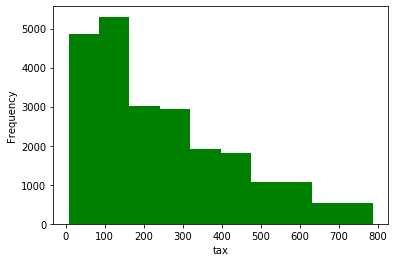

In [30]:
#Histogram for continous variables
Tax = Customer_Final['Tax']
plt.hist(Tax,color=['Green'])
plt.xlabel('tax')
plt.ylabel('Frequency')
plt.show()

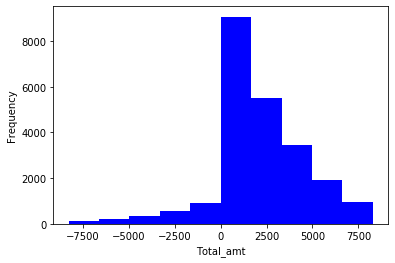

In [31]:
Total_amt = Customer_Final['total_amt']
plt.hist(Total_amt,color = 'blue')
plt.xlabel('Total_amt')
plt.ylabel('Frequency')
plt.show()

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


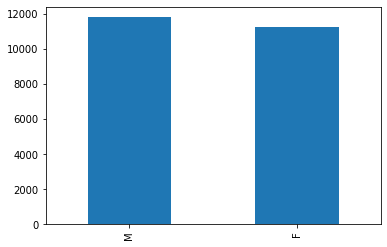

In [32]:
#Frequency bar for categorical variables
Customer_Final['Gender'].value_counts().plot('bar')

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


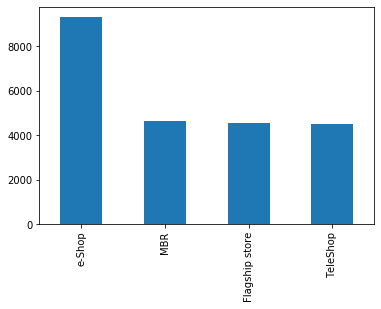

In [33]:
#2.
Customer_Final['Store_type'].value_counts().plot('bar')

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


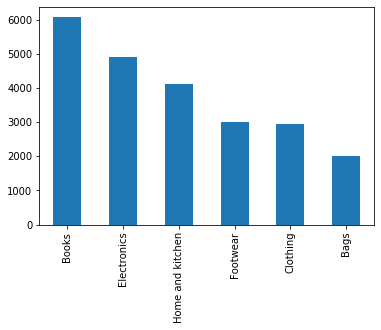

In [34]:
#3.
Customer_Final['prod_cat'].value_counts().plot('bar')

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


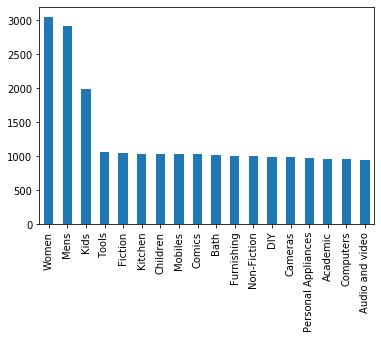

In [35]:
#4.
Customer_Final['prod_subcat'].value_counts().plot('bar')

In [36]:
#4a.Time period of the available transaction data


In [37]:
#4b.count number of negative amount 
neg = Customer_Final['total_amt']
no_neg = Customer_Final.loc[(neg<0),['total_amt']].count()
no_neg

total_amt    2177
dtype: int64

In [38]:
#5.Analyze which product categories are more popular among females vs male customers

#popular among men 
men = Customer_Final.loc[(Customer_Final['Gender']=='M')]
group_prod = men.groupby(["prod_cat"])['total_amt'].sum()
popular_m = group_prod.nlargest(1)
display('The most popular product category in Male customers is : ',popular_m)

#popular among female
women = Customer_Final.loc[(Customer_Final['Gender']=='F')]
group_prod = women.groupby(["prod_cat"])['total_amt'].sum()
popular_f = group_prod.nlargest(1)
display('The most popular product category in Male customers is : ',popular_f)

'The most popular product category in Male customers is : '

prod_cat
Books    6645972.775
Name: total_amt, dtype: float64

'The most popular product category in Male customers is : '

prod_cat
Books    6164692.235
Name: total_amt, dtype: float64

In [39]:
#6.Which City code has the maximum customers and what was the percentage of customers from that city?
max_cust = customer['city_code'].value_counts()
t = max_cust.nlargest(1)
display("City code which has Maximum customers is : ",t)

#percentage of customers from city code 3
tot_customer = customer['customer_Id'].count()
percent = round((595/tot_customer)*100,2)
print("Percentage of customers from the city code 3 is {}% : ".format(percent))

'City code which has Maximum customers is : '

3.0    595
Name: city_code, dtype: int64

Percentage of customers from the city code 3 is 10.54% : 


In [40]:
#7.Which store type sells the maximum products by value and by quantity?
sort_list = Customer_Final.sort_values(['total_amt','Qty'],ascending = False)
display(sort_list.head(1)['Store_type'])

3184    e-Shop
Name: Store_type, dtype: object

In [41]:
#8.What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

df = pd.DataFrame(Customer_Final)
tf = df[df.prod_cat.isin(['Electronics','Clothing']) & (df.Store_type == 'Flagship store')]
total = tf.total_amt.sum()
print('Total amount earned',total)

Total amount earned 3409559.27


In [42]:
#9.What was the total amount earned from "Male" customers under the "Electronics" category?
tf1 = df[(df.Gender == 'M') & (df.prod_cat == 'Electronics')]
total = tf1.total_amt.sum()
print('Total amount earned',total)

Total amount earned 5703109.425


In [43]:
#10.How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

df1 = df[(df.total_amt > 0)]
ts  = df1.transaction_id.nunique()
print('Total customers having more than 10 unique transactions are - ',ts)

Total customers having more than 10 unique transactions are -  20876


In [44]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(df['DOB']).year          #extract year from DOB
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
df['age'] = (np.where(dob_year > curr_year,v,y))
df

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,age
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,50
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,50
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,50
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,50
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction,28
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction,28
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction,28
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction,28


In [45]:
#11.a. What was the total amount spent for “Electronics” and “Books” product categories?
total = df.loc[((df.age >25) & (df.age <35)) & ((df.prod_cat=='Books') | (df.prod_cat=='Electronics'))]['total_amt'].sum()
print('Total amount spent',total)

Total amount spent 7041794.825


In [46]:
#11.b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

t_date = Customer_Final[(Customer_Final['tran_date'] > '2014-01-01') & (Customer_Final['tran_date'] < '2014-03-01')]
total_amount = t_date.total_amt.sum()
print('Total amount spent by the customer - ',total_amount)

Total amount spent by the customer -  1305716.62
